## **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively. 


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:
 
* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.
 

# Multiple Linear Regression

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [2]:
# Get dataset
df = pd.read_csv('Income_dataset.csv')

In [3]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


# Analyze data

In [4]:
df.shape

(20, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [6]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

In [7]:
# Describe data
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


These statistics provide a comprehensive overview of the distribution and spread of the age, experience, and income variables in dataset. They help in understanding the central tendency, variability, and range of the data.

## Distribution

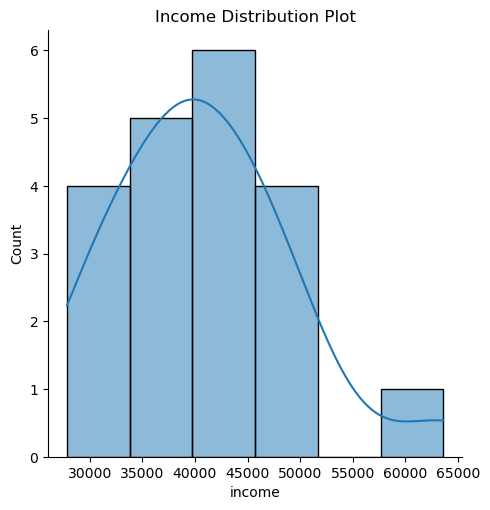

In [8]:
# Data distribution using displot
sns.displot(df['income'], kde=True)
plt.title('Income Distribution Plot')
plt.show()

The graph represents how incomes are distributed within the dataset, highlighting the most common income ranges and the overall distribution pattern.

## Relationship between Income and Experience

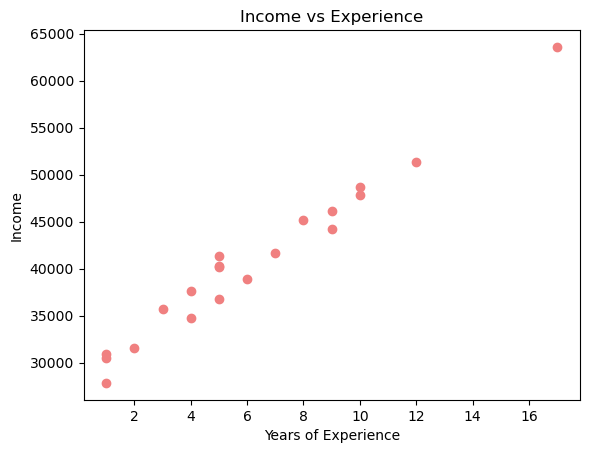

In [9]:
# Relationship between Income and Experience
plt.scatter(df['experience'], df['income'], color = 'lightcoral')
plt.title('Income vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()

The above plot indicates that there is a relationship between Income and Experience 

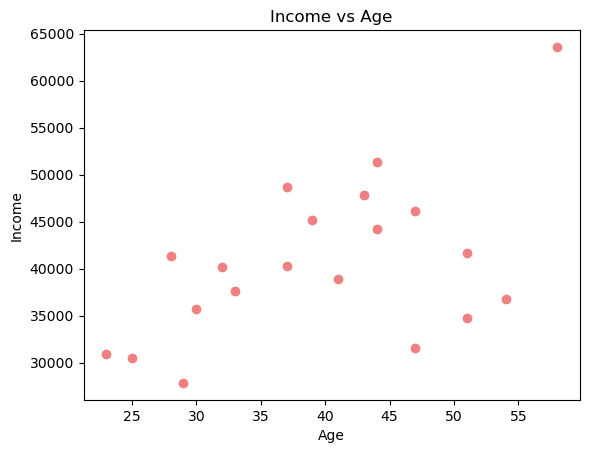

In [10]:
# Relationship between Income and Age
plt.scatter(df['age'], df['income'], color = 'lightcoral')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

The above plot indicates that there is no strong relationship between Income and Age

## Correlation

In [12]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


## Heatmap

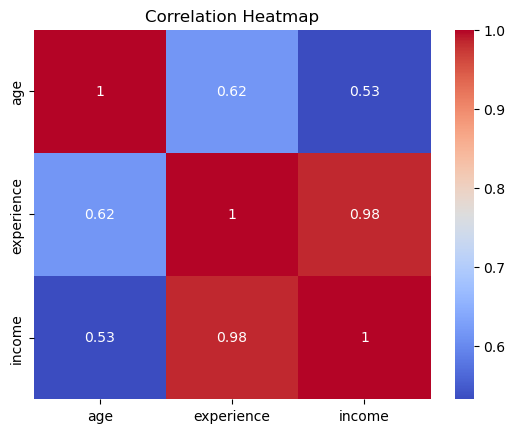

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add titles and labels
plt.title('Correlation Heatmap')
plt.show()

#### Interpretation:
**Diagonal Values (1.000000):** The diagonal values are always 1 because a variable is perfectly correlated with itself.

**Off-Diagonal Values:** 

**Age and Experience (0.615165):** This value indicates a moderate positive correlation between age and experience. As age increases, experience tends to increase as well.

**Age and Income (0.532204):** This value indicates a moderate positive correlation between age and income. As age increases, income tends to increase, but the relationship is not as strong as between experience and income.

**Experience and Income (0.984227):** This value indicates a very strong positive correlation between experience and income. As experience increases, income also tends to increase significantly. This strong positive relationship suggests that experience is a good predictor of income.

**What This Tells Us:**

**Moderate Positive Correlation:** The moderate positive correlations between age and experience (0.615165) and between age and income (0.532204) suggest that both age and experience have some influence on income, but experience has a stronger impact.

**Strong Positive Correlation:** The very strong positive correlation between experience and income (0.984227) indicates that experience is a key factor in determining income. This strong relationship suggests that individuals with more experience tend to have higher incomes.

# Split data

## Split into Independent/Dependent variables

In [14]:
# Splitting variables
X = df[['age','experience']]  # independent variable
y = df['income']  # dependent variable

Use double brackets to ensure that X is a DataFrame. This is important because machine learning models expect the input features to be in a 2-dimensional format. Using a single bracket returns a pandas Series.

## Split into Train/Test sets

In [15]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# Check the sizes of X_train and y_train 
print("Size of X_train:", X_train.shape) 
print("Size of y_train:", y_train.shape)

Size of X_train: (16, 2)
Size of y_train: (16,)


# Train model

In [20]:
# Regressor model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict results

In [26]:
# Prediction result
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [27]:
y_pred_test

array([46487.25542968, 34623.71312375, 49379.11875301, 38349.57565764])

In [28]:
y_test

18    44190
1     35670
19    48700
8     40250
Name: income, dtype: int64

# Visualize predictions

## Prediction on training set

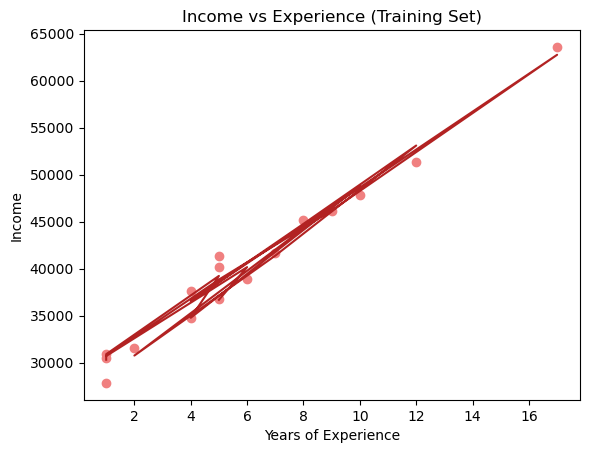

In [29]:
# Prediction on training set
plt.scatter(X_train['experience'], y_train, color='lightcoral')
plt.plot(X_train['experience'], y_pred_train, color='firebrick')
plt.title('Income vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()

## Prediction on test set

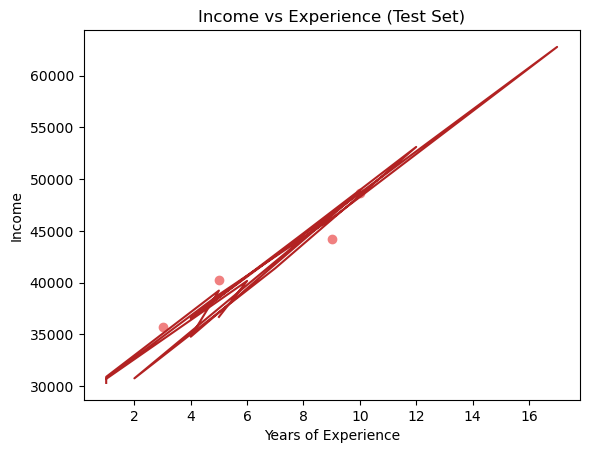

In [31]:
# Prediction on test set
plt.scatter(X_test['experience'], y_test, color='lightcoral')
plt.plot(X_train['experience'], y_pred_train, color='firebrick')
plt.title('Income vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()

# Coefficient and Intercept

In [32]:
# Regressor coefficients and intercept
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [ -97.99352918 2205.90861907]
Intercept: 30945.793141906892


## MSE, RMSE and R²

In [33]:
# Calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred_test) 
print("Mean Squared Error (MSE):", mse) 

# Calculate Root Mean Squared Error (RMSE) 
rmse = np.sqrt(mse) 
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R² (R square)
r2 = r2_score(y_test, y_pred_test)
print("R² Score:", r2)

Mean Squared Error (MSE): 2611228.4245839915
Root Mean Squared Error (RMSE): 1615.9295852802472
R² Score: 0.8872690560355565


The R² score indicates the proportion of the variance in the dependent variable (Income) that is predictable from the independent variables (Age and Experience). An R² score of 0.8872690560355565 means that approximately 88.73% of the variance in Income can be explained by Age and Experience. This is a high value, indicating a good fit of the model to the data.

**Good Fit:** The high R² score suggests that the model explains most of the variability in the dependent variable, making it a good fit for the data.

**Prediction Accuracy:** While the MSE is relatively high, the high R² score indicates that the model is still very accurate in predicting the dependent variable.

**Practical Implications:** The model can be used to make reliable predictions about Income based on Age and Experience, but it's important to consider the scale of the data when interpreting the MSE.

## Predictions:

In [35]:
# New data for prediction (e.g., new age and experience values)
new_data = pd.DataFrame({'age': [30, 40, 50], 'experience': [5, 10, 15]})  

# Predict future values
predictions = model.predict(new_data)

# Output the predictions
print("Predicted Income:", predictions)

Predicted Income: [39035.5303619  49085.13816547 59134.74596905]
